<a href="https://colab.research.google.com/github/Kai-Infernus/pune_house_rent_prediction/blob/main/Pune_rent_predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

# Importing the dataset

Data [Pune House Rent Prediction](https://www.kaggle.com/datasets/rahulmishra5/pune-house-rent-prediction)

In [ ]:
!wget https://raw.githubusercontent.com/Kai-Infernus/pune_house_rent_prediction/main/Pune_rent.csv

--2022-04-16 19:00:44--  https://raw.githubusercontent.com/Kai-Infernus/pune_house_rent_prediction/main/Pune_rent.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403750 (1.3M) [text/plain]
Saving to: ‘Pune_rent.csv’

Pune_rent.csv       100%[===================>]   1.34M  --.-KB/s    in 0.04s   

2022-04-16 19:00:44 (33.4 MB/s) - ‘Pune_rent.csv’ saved [1403750/1403750]



In [ ]:
data = pd.read_csv('Pune_rent.csv')

# Data Observation

In [ ]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [ ]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

AGENT      16271
OWNER       6097
BUILDER      432
Name: seller_type, dtype: int64
********************
2    10612
1     7925
3     3566
4      626
5       66
6        3
8        2
Name: bedroom, dtype: int64
********************
BHK    21726
RK      1074
Name: layout_type, dtype: int64
********************
Apartment            20172
Studio Apartment      1074
Independent House      912
Independent Floor      353
Villa                  278
Penthouse               11
Name: property_type, dtype: int64
********************
Wagholi           2169
Hinjewadi         1457
Wakad             1259
Kharadi           1220
Hadapsar          1135
                  ... 
Sindhi Colony        1
Kalwad               1
Baderaj Colony       1
Marunji Road         1
Aundh Gaon           1
Name: locality, Length: 459, dtype: int64
********************
15,000    1241
18,000    1156
12,000    1089
20,000    1002
16,000     969
          ... 
76,843       1
1.29         1
1.17         1
1.09         1
13,250  

# Cleaning the data

**Null values in Bathroom Column**

In [ ]:
data.isna().sum()

seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

**Removing the null values and converting to int**

In [ ]:
values = ['1','2','3','4','5','6']
data = data[data.bathroom.isin(values) == True]
print(data['bathroom'].value_counts())

2    11184
1     7598
3     3103
4      569
5      126
6       15
Name: bathroom, dtype: int64


In [ ]:
data['bathroom'] = data['bathroom'].astype(int)
data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2


**We'll convert the price column into integer.**

In [ ]:
data['price'] = data['price'].astype(str).replace(',', '')
data['price'] = data['price'].apply(lambda x: x.replace(',','')).astype('float')
data['price'] = data['price'].astype(int)
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000,1005,Semi-Furnished,2


In [ ]:
location_count = data['locality'].value_counts()
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

maharshi nagar          10
Mukund Nagar            10
Pimpri Chinchwad        10
Dehu Road Cantonment     9
Sanaswadi                9
                        ..
Sindhi Colony            1
Kalwad                   1
Baderaj Colony           1
Marunji Road             1
Aundh Gaon               1
Name: locality, Length: 332, dtype: int64

In [ ]:
data['locality'] = data['locality'].apply(lambda x: 'OTHERS' if x in location_count_less_than_10 else x)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22595 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22595 non-null  object
 1   bedroom        22595 non-null  int64 
 2   layout_type    22595 non-null  object
 3   property_type  22595 non-null  object
 4   locality       22595 non-null  object
 5   price          22595 non-null  int64 
 6   area           22595 non-null  int64 
 7   furnish_type   22595 non-null  object
 8   bathroom       22595 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


# **Visualising the data and removing the outliers**

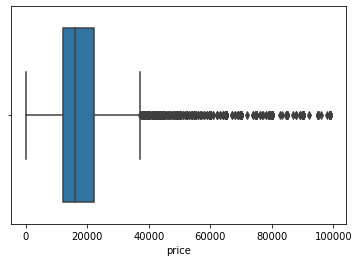

In [ ]:
sns.boxplot(data=data,x='price');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


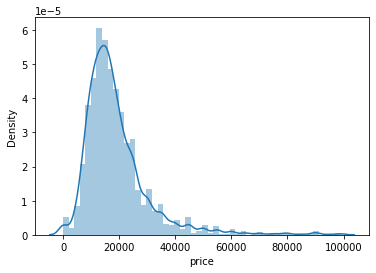

In [ ]:
sns.distplot(data["price"])

In [ ]:
a = data[data['price'] < 1000].index
data.drop(a,inplace=True)
data = data[data['price'] <= 35000]

Text(0, 0.5, 'Price')

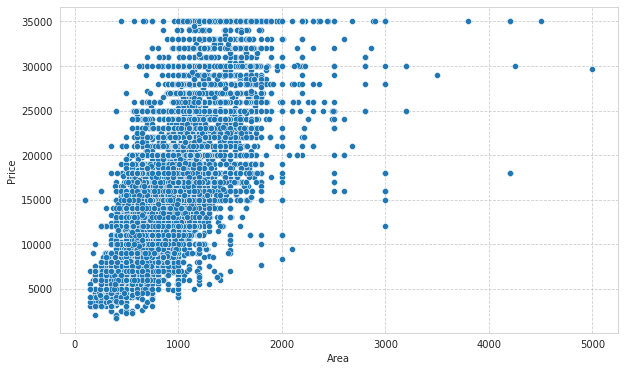

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

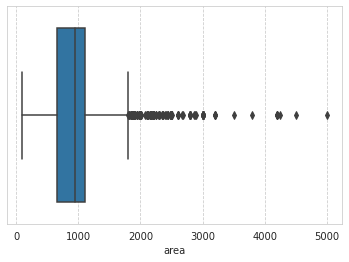

In [ ]:
sns.boxplot(data=data,x='area');

In [ ]:
data = data[data['area'] <= 1800]

Text(0, 0.5, 'Price')

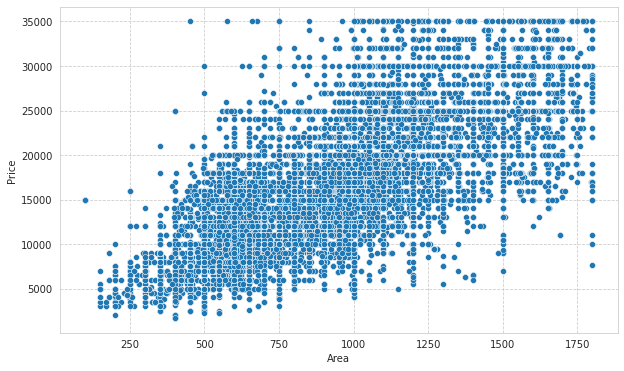

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

 Drop outliers of price value and area

In [ ]:
data = data.drop(data[(data.area<250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price==35000)].index)
data = data.drop(data[(data.area<500) & (data.price==25000)].index)
data = data.drop(data[(data.area<=750) & (data.price==35000)].index)
data = data.drop(data[(data.area==500) & (data.price>25000) ].index)
data = data.drop(data[(data.area>1750) & (data.price>=10000) & (data.price<15000)].index)
data = data.drop(data[(data.area>750) & (data.area<1000) & (data.price<5000)].index)
data = data.drop(data[(data.area==250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price>20000)].index)
data = data.drop(data[(data.area>1750) & (data.price<10000)].index)
data = data.drop(data[(data.area<800) & (data.price>35000)].index)

Text(0, 0.5, 'Price')

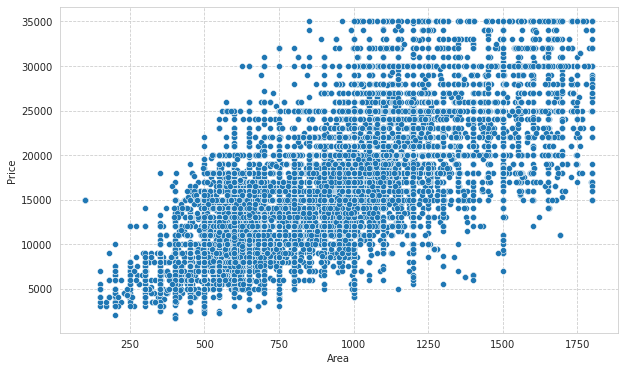

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

# Cleaned Data

In [ ]:
data.to_csv("Cleaned_data.csv")

In [ ]:
X = data.drop(columns=['price'])
y = data['price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.19,random_state=2)

# Applying Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7844523702093363
MAE 2379.6933187558716


In [ ]:
y_pred = pipe.predict(X_test)
yt_pred = pipe.predict(X_train)

print('Predicted Value for model is : \n' ,list(y_pred[:5]))
print('real Value for model is : \n' , y_test[:5])

Predicted Value for model is : 
 [18790.903091783868, 9551.489489147067, 10623.062487193942, 11876.573379869807, 6243.190700657438]
real Value for model is : 
 3837     19000
21985     9000
14776    10000
18807    10540
16326     8000
Name: price, dtype: int64


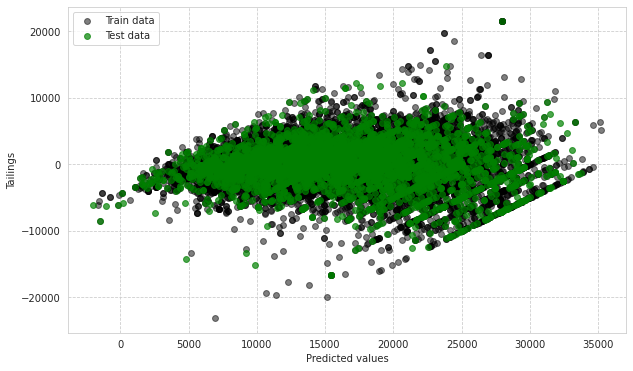

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(yt_pred,yt_pred - y_train,c = 'black', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
plt.scatter(y_pred,y_pred - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.show()

# Dumping the model to a pickle File

In [35]:
import pickle
pickle.dump(pipe,open('pune_rent.pkl','wb'))

**Conclusion**

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test,y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 
print('R2 score:',r2_score(y_test,y_pred))

MAE: 2379.6933187558716
MSE: 10113872.284891436
RMSE: 3180.231482909921
R2 score: 0.7844523702093363


**Thank You for visiting my work !
ʕ •ᴥ•ʔ**